# Unit 7 Workbook
**DATA SET G (Filtration.xlsx)**

The final process in the production of a chemical product involves filtration to remove impurities in the form of unwanted side products. The production manager wished to compare the effectiveness of two possible filter agents, Agent 1 and Agent 2. Each of 12 batches of the product were prepared, and half of each batch was filtered using Agent 1, and the other half using Agent 2. Following filtration, the amount of impurity (in parts per 1000 by weight) still present in the product was determined.
```txt
Variable	Description
Batch		Batch identification number (1 – 12)
Agent1		Impurities present after filtration with Agent 1 (parts per 1000)
Agent2		Impurities present after filtration with Agent 2 (parts per 1000)
```

In [2]:
import pandas as pd
import pprint

file_path = '../data/Exe8.4G.xlsx'  # Update this to the path of your Excel file
sheet_name = 'Sheet1'  # Update this with the name of your sheet if needed
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Specify the columns
agent1_cl = 'Agent1'
agent2_cl = 'Agent2'
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(df[[agent1_cl, agent2_cl]])

    Agent1  Agent2
0      7.7     8.5
1      9.2     9.6
2      6.8     6.4
3      9.5     9.8
4      8.7     9.3
5      6.9     7.6
6      7.5     8.2
7      7.1     7.7
8      8.7     9.4
9      9.4     8.9
10     9.4     9.7
11     8.1     9.1


In [3]:
import scipy.stats as stats
import numpy as np
# Data from the image
data = df[agent1_cl] - df[agent2_cl]
# Doing a Shapiro-Wilk Test to see if the data is normally distributed
# If the test value is closer to one then it is more likely a normally distributed (Khatun, N., 2021)
shapiro_test = stats.shapiro(data)
print('Shapiro test:', shapiro_test)
print(f"Shapiro-Wilk test: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro test: ShapiroResult(statistic=0.8488310715153763, pvalue=0.035513906482025834)
Shapiro-Wilk test: statistic=0.8488310715153763, p-value=0.035513906482025834


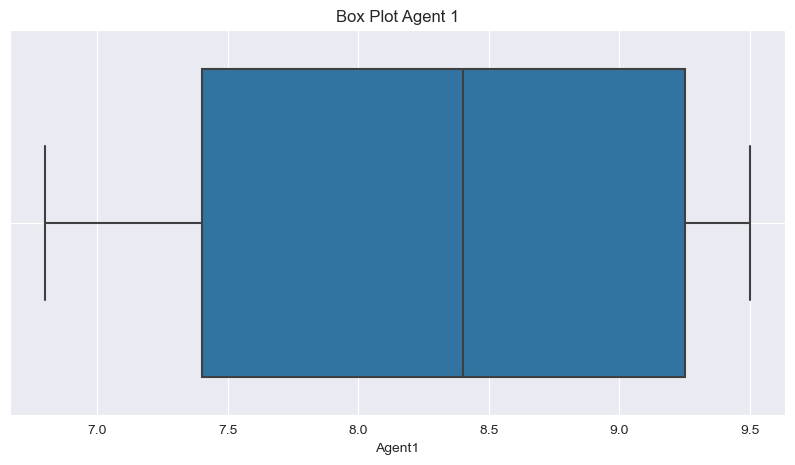

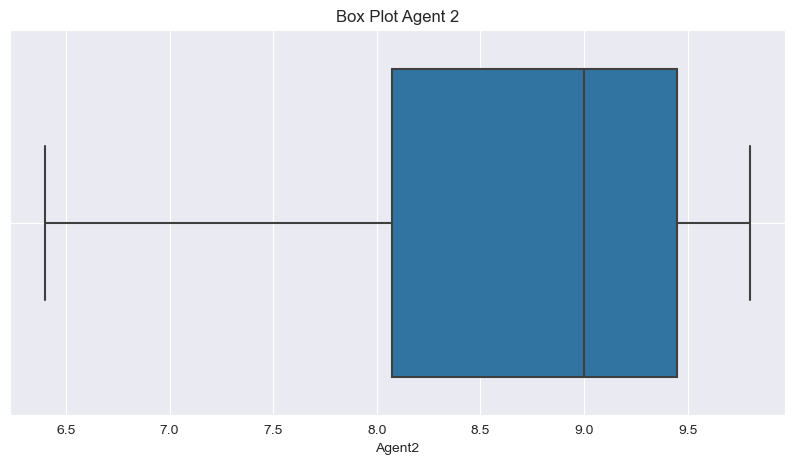

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating the plot

plt.figure(figsize=(10, 5))
sns.boxplot(x=df[agent1_cl])
plt.title('Box Plot Agent 1')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df[agent2_cl])
plt.title('Box Plot Agent 2')
plt.grid(True)
plt.show()

### Hypothesis Testing Ex 7.1

#### Assumptions
* Observations in each sample are normally distributed. (Since the shapiro test shows a value close to one this can be assumed)
* $\alpha$ = 0.01 or 1% as this is a general value for medical studies 


#### Defining Hypothesis
Defining the null hypothesis as Agent 1 having better effect than Agent 2 , so in this case as the means represent the amounts of impurity remaining the better agent is the one with less impurity 
or the lesser mean. This leads to our null hypothesis being mean of Agent 2 is greater than Agent 1, suggesting that Agent 2 is worse and if the H$_{0}$ is not rejected.<br>
H$_{0}$: $\mu_{2} \geq \mu_{1} $ (Null Hypothesis)<br>
H$_{1}$: $\mu_{1} \leq \mu_{1} $ (Alternate Hypothesis)<br>


In [5]:
# Result using Paired samples
ttest,p_value = stats.ttest_rel(df[agent1_cl], df[agent2_cl])
print("p value:%.8f" % p_value)
p_val_one_tailed = p_value / 2

print("Since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_val_one_tailed))

# Since this is a one-tailed test the p value has to be divided into half as 
if p_val_one_tailed <0.01:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00754599
Since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


<br>
<img src="../data/ex7-1.png" width="1200" height="800" />

#### Conclusion
The results are obtained with paired samples t = 2.71 with 11 degrees of freedom.
Following the one tailed t test using paired samples, we get a p-value of 0.0038 which is less than our assumed alpha ($\alpha$) of 1% meaning in this case we would reject the null hypothesis that Agent 1 is better Agent 2. So this could mean that "Agent 2 could be better than Agent 1". However, doing a paired sample test is not the optimal test as Agent 1 and Agent 2 are not paired but are independent of each other and would not be the best fitting test for this case.


### Hypothesis Testing Ex 7.2
```txt
This data set shows the incomes of 60 male and 60 female cardholders of a certain bank's "Superplus Diamond" card. 

Variable	Description
Sex		The cardholder’s sex (F = female, M = male)
Income	The cardholder’s gross annual income (in £’000’s)
```

#### Assumptions
* Observations in each sample are independent and identically distributed (iid) as the sample individuals men and women do not depended on each other.
* Observations in each sample are normally distributed. (Since the shapiro test shows a value close to one this can be assumed)
* $\alpha$ = 0.05 or 5% as this is a general value for behavioral studies 


#### Defining Hypothesis
H$_{0}$: $\mu_{m} = \mu_{f} $ (Null Hypothesis)<br>
H$_{1}$: $\mu_{m} \neq \mu_{f} $ (Alternate Hypothesis)<br>

In [6]:
file_path = 'data/Exe8.6C.xlsx'  # Update this to the path of your Excel file
sheet_name = 'Sheet1'  # Update this with the name of your sheet if needed
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Specify the columns
sex_cl = 'Sex'
income_cl = 'Income'
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(df[[sex_cl, income_cl]])

FileNotFoundError: [Errno 2] No such file or directory: 'data/Exe8.6C.xlsx'

In [ ]:
# Filter the DataFrame where Diet has "Sex is male" and Income columns has male values
filtered_df_male = df.loc[(df[sex_cl] == 'M'), income_cl ]
filtered_df_female = df.loc[(df[sex_cl] == 'F'), income_cl ]




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the plot

plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_df_male)
plt.title('Box Plot Male')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_df_female)
plt.title('Box Plot Female')
plt.grid(True)
plt.show()

In [ ]:
ttest,p_value = stats.ttest_ind(filtered_df_male,filtered_df_female)
print("p value:%.8f" % p_value)

if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


### Conclusion
<img src="../data/ex7-2.png" width="1200" height="800" />
<br>

A two-tailed independent t-test with unequal variance is appropriate here because looking at the box plot for the two data sets the spread for both data are different and suggests that the variance for the sample data is unequal. <br>

As the p-value obtained that is 0.014 from the two-tailed independent t-test is less than the significance level or the $\alpha$ value of 0.05 which leads to the rejection of the null hypothesis. This test suggests that there is a difference between the mean between male and female income. Also the mean of the two data set shows us different means where the mean of the income of males is 52.91 compared to the female which is 44.23, showing that the male earn more than the female counterpart.

# References
Khatun, N., 2021. Applications of normality test in statistical analysis. Open Journal of Statistics, 11(01), p.113.